In [1]:
%matplotlib inline

In [2]:
import itertools
import matplotlib.pylab as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("../resources/TB3MS.csv", parse_dates=["DATE"])
r = np.loadtxt("../treasury_bill_output_r.txt")
change_points = np.loadtxt("../treasury_bill_output_change_points.txt").astype(np.uint)

In [4]:
max_length = np.where(np.sum(np.exp(r), axis=0) < 1E-4)[0][0]
max_length

159

(0.0, 159.0)

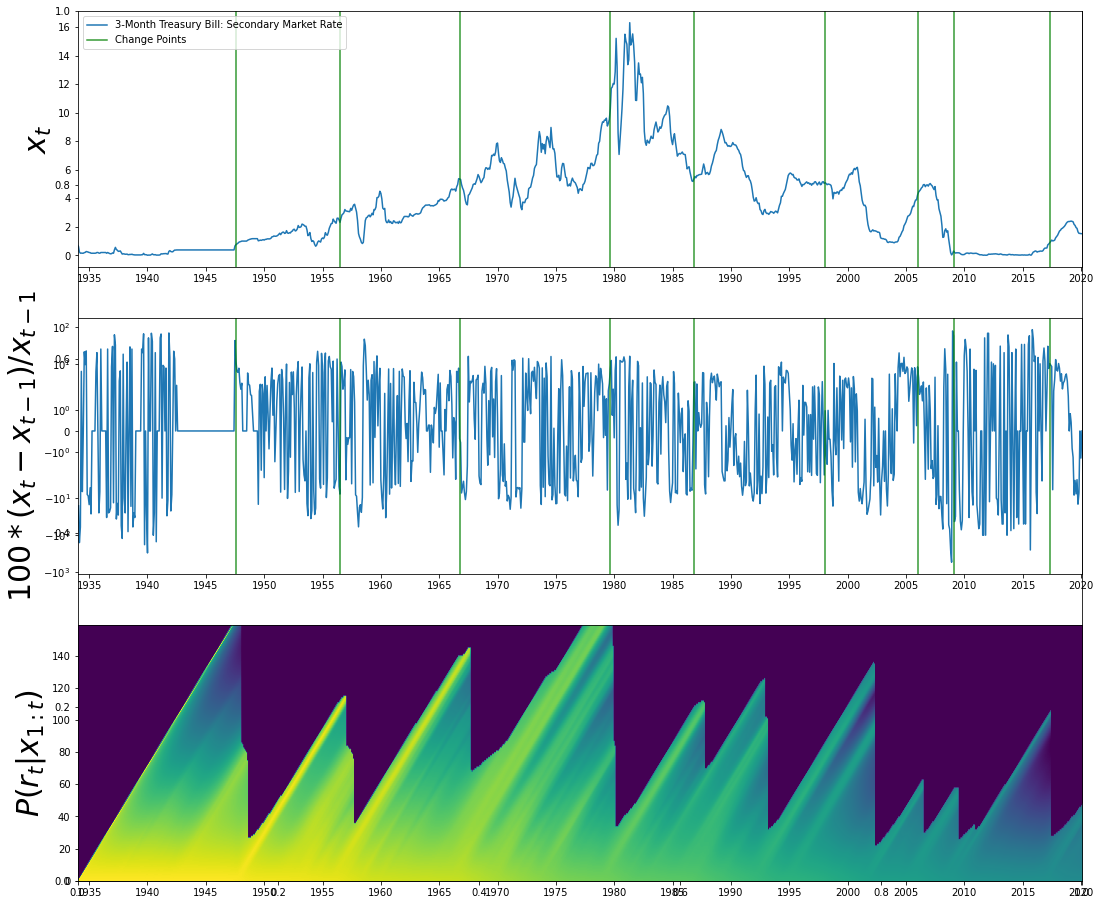

In [5]:
fig, ax = plt.subplots(figsize=[18, 16])

ax = fig.add_subplot(3, 1, 1)
ax.plot("DATE", "TB3MS", data=data, label="3-Month Treasury Bill: Secondary Market Rate")
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

#ax.set_yscale('symlog', linthreshy=20)
ax.set_ylabel("$x_t$", fontsize=30)
for change_point in change_points:
    line = ax.axvline(data.DATE.iloc[change_point], color="green", alpha=0.8)
line.set_label("Change Points")
ax.legend()

ax = fig.add_subplot(3, 1, 2, sharex=ax)
pct_changes = np.diff(data["TB3MS"]) /data["TB3MS"].values[1:] * 100
ax.set_yscale("symlog")
ax.set_ylabel("$100*(x_t - x_{t-1}) / x_{t-1}$", fontsize=30)
ax.plot(data["DATE"].values[1:], pct_changes, label="")
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

for change_point in change_points:
    line = ax.axvline(data.DATE.iloc[change_point], color="green", alpha=0.8)

ax = fig.add_subplot(3, 1, 3, sharex=ax)
x_lims = mdates.date2num([data.DATE.min(), data.DATE.max()])
rp = np.rot90(r, 1)
rp[np.isinf(rp)] = np.min(rp[np.isfinite(rp)])

ax.imshow(
    rp,
    cmap=cm.viridis,
    extent = [x_lims[0], x_lims[1], 0, r.shape[1]],
    aspect="auto",
)
ax.set_ylabel("$P(r_t|x_{1:t})$", fontsize=30)
ax.set_ylim(0, max_length)